## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")



Data imported successfully


In [3]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

##### Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

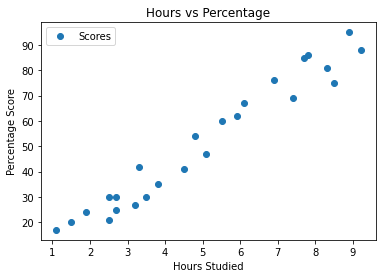

In [7]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [8]:
x = data.iloc[:,:-1].values  
y = data.iloc[:,:-1].values  

In [9]:
print (x);
print (y);

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [10]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


##### Now that we have our attributes and labels, the next step is to split this data into training and test sets.
##### We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [11]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0) 
print("x_train")
x_train
      


x_train


array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [12]:
print("x_test")
x_test

x_test


array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [13]:
print("y_train")
y_train

y_train


array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [14]:
print("y_test")
y_test

y_test


array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [15]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

print("Training complete.")

Training complete.


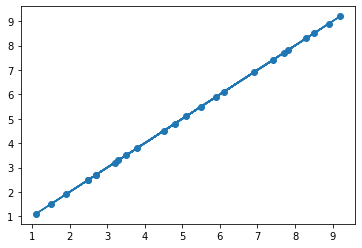

In [16]:
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [17]:
print(x_test) # Testing data - In Hours
y_pred = regressor.predict(x_test) # Predicting the scores
y_pred

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [18]:
# Comparing Actual vs Predicted
df = ({'Actual': y_test, 'Predicted': y_pred})  
df 

{'Actual': array([[1.5],
        [3.2],
        [7.4],
        [2.5],
        [5.9]]),
 'Predicted': array([[1.5],
        [3.2],
        [7.4],
        [2.5],
        [5.9]])}

In [19]:
# You can also test with your own data
Hours= 9.25
x_test_sum = x_train[:,:]
x_test_sum[0]= Hours
Pred_Hours = regressor.predict(x_test_sum)

In [20]:

print("number of Hours ={}".format(Hours))
print("Predicted Score ={}".format(Pred_Hours[0]))

number of Hours =9.25
Predicted Score =[9.25]


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [22]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 3.552713678800501e-16
